# MPC affinity matrix: `R` magic

In [8]:
%load_ext rpy2.ipython

In [6]:
%%bash
ls /data_/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC010/ses-01/mpc/acq-T1map/*atlas-schaefer-400_desc-MPC.txt

/data_/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC010/ses-01/mpc/acq-T1map/sub-PNC010_ses-01_atlas-schaefer-400_desc-MPC.txt


R[write to console]: corrplot 0.92 loaded

R[write to console]: Loading required package: viridisLite

R[write to console]: 
Attaching package: ‘viridis’


R[write to console]: The following object is masked from ‘package:viridisLite’:

    viridis.map




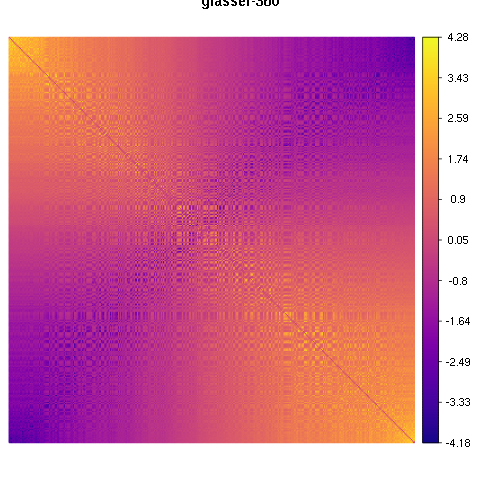

In [9]:
%%R
library(corrplot)
library(viridis)
library(RColorBrewer)
library(SNFtool)

# Change working directory
setwd("/data_/mica3/BIDS_PNI/derivatives/micapipe_v0.2.0/sub-PNC003/ses-01/mpc/acq-T1map")

# Set path to files
IP <- list.files(path='.', pattern="*_desc-intensity_profiles.txt")
MPC <- list.files(path='.', pattern="*_desc-MPC.txt")

# set function: Load and plot intesity profile and Eiogen vector of the MPC matrix
for (i in 4) {
  # set the atlas name
  atlas <- strsplit(strsplit(IP[i], 'atlas-')[[1]][2],'_')[[1]][1]
  # load the intesity profiles
  ip_mtx <- as.matrix(read.table(IP[i], header = FALSE, sep = ' '))
  ip_mtx[is.na(ip_mtx)] <- 0
  indx <- which(colSums(ip_mtx)==0)
  ip_mtx <- ip_mtx[, -indx]
  
  # load the mpc matrices
  mpc_mtx <- as.matrix(read.table(MPC[i], header = FALSE, sep = ' '))
  mpc_mtx[lower.tri(mpc_mtx)] <- t(mpc_mtx)[lower.tri(mpc_mtx)]
  indx <- which(colSums(mpc_mtx)==0)
  mpc_mtx <- mpc_mtx[-indx, -indx]
  
  # plot the intesities
  corrplot(ip_mtx, is.corr = FALSE, method = "color", title = atlas, 
           tl.pos = 'n', col=gray.colors(256),cl.pos = 'n')
  
  # plot the mpc matrix
  # AOE FPC hclust
  corrplot(mpc_mtx, is.corr = FALSE, method = "color", title = atlas, 
           tl.pos = 'n', col=plasma(256), order="FPC")
}


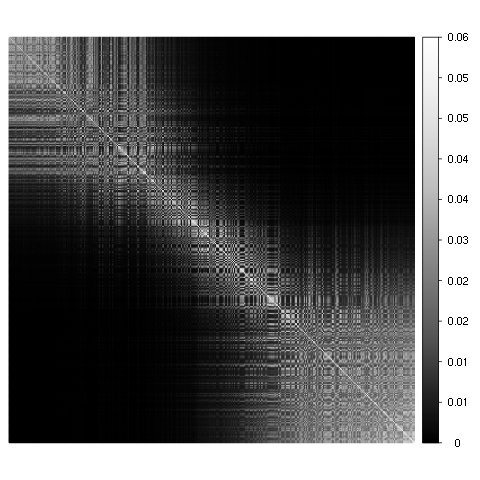

In [10]:
%%R
spectral <- colorRampPalette(rev(brewer.pal(11,'PuOr')))
indx <- order(colMeans(mpc_mtx))
corrplot(mpc_mtx[indx,indx], is.corr = FALSE, method = "color", title = atlas, 
         tl.pos = 'n', col=spectral(256), order="FPC")

corrplot(ip_mtx[,indx], is.corr = FALSE, method = "color", 
         tl.pos = 'n', col=gray.colors(256),cl.pos = 'n')

corrplot(mpc_mtx, is.corr = FALSE, method = "color", title = atlas, 
         tl.pos = 'n', col=spectral(256))

cmap <- colorRampPalette(rev(brewer.pal(9,'Greys')))

# AFFINITY matrix of the MPC
dist1 <- as.matrix(dist(mpc_mtx))
aff <- affinityMatrix(dist1, K = 300, sigma = 0.5)
corrplot(aff, is.corr = FALSE, method = "color", title = NA, 
         tl.pos = 'n', col=cmap(256), order="FPC")
